In [132]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [133]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Tue, 15 Oct 2019 14:03


In [134]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [135]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [136]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"31,066,870","32,527,617","1,460,747",4.70%
HOV,"108,593","111,841","3,248",2.99%
Principal Arterial,"139,789","159,765","19,976",14.29%
Ramp,"29,383","24,821","-4,562",-15.53%
Total,"31,344,635","32,824,044","1,479,409",4.72%


----
### By County

In [137]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"23,323,275","24,291,191","967,916",4.15%
Pierce,"2,983,025","3,423,067","440,042",14.75%
Snohomish,"5,038,335","5,109,786","71,451",1.42%
Total,"31,344,635","32,824,044","1,479,409",4.72%


----
### Scatterplots 

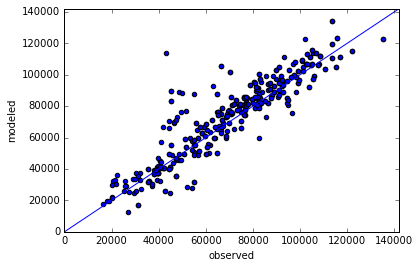

In [138]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [139]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.913473202054


---
By County

King r^2: 0.922621752493
Pierce r^2: 0.604640161483
Snohomish r^2: 0.980869277541


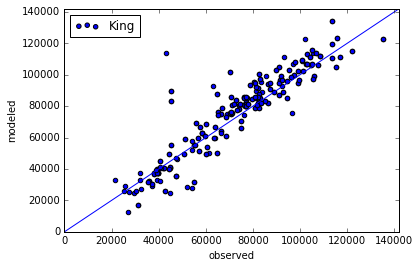

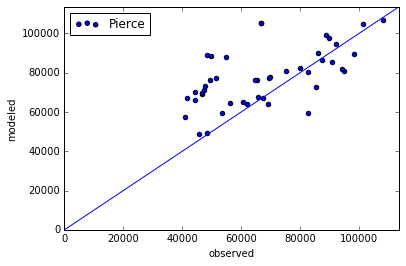

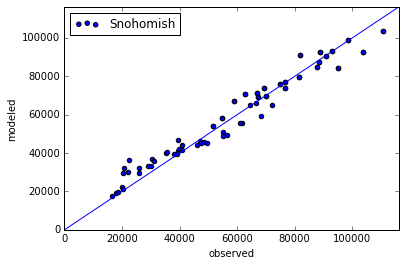

In [140]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.906185744941
r^2 Principal Arterial: 0.80946349559


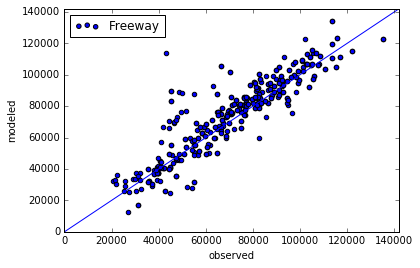

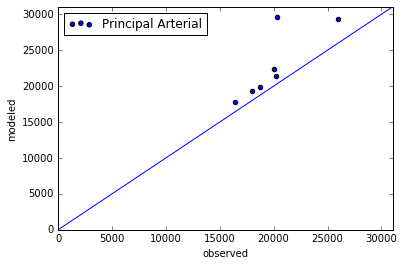

In [141]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [142]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","546,223","-22,194",-3.90%
1,KENT,"550,322","501,437","-48,885",-8.88%
2,SEATTLE - SOUTH OF CBD,"526,500","512,444","-14,056",-2.67%
3,SHIP CANAL,"519,802","540,106","20,304",3.91%
4,KIRKLAND-REDMOND,"414,120","395,450","-18,670",-4.51%
5,MILL CREEK,"400,848","396,668","-4,180",-1.04%
6,SOUTH BELLEVUE,"399,500","368,803","-30,697",-7.68%
7,SEATTLE - NORTH,"372,000","378,677","6,677",1.79%
8,TACOMA - EAST OF CBD,"312,164","326,863","14,699",4.71%
9,PARKLAND,"304,322","269,615","-34,707",-11.40%


r^2 : 0.992022963459


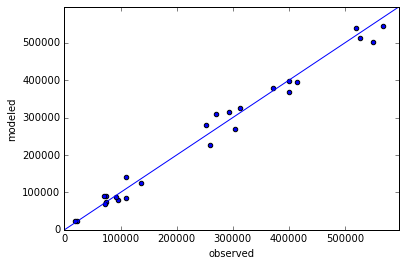

In [143]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [144]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
df[['observed_20to5','modeled_20to5','diff']] = df[['observed_20to5','modeled_20to5','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_20to5', ascending=False)

,agency,observed_20to5,modeled_20to5,diff,perc_diff
2,King County Metro,"392,694","481,836","89,142",22.70%
5,Sound Transit,"145,426","135,954","-9,472",-6.51%
0,Community Transit,"30,918","36,478","5,560",17.98%
4,Pierce Transit,"27,233","42,057","14,824",54.43%
6,Washington Ferries,"16,912","4,145","-12,767",-75.49%
3,Kitsap Transit,"8,669","14,222","5,552",64.04%
1,Everett Transit,"3,290","2,202","-1,088",-33.08%


----
### Key Routes
#### Ferries

In [145]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_20to5','modeled_20to5']] = df[['observed_20to5','modeled_20to5']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_20to5,modeled_20to5,diff,perc_diff
0,POF West Seattle - S,"1,356","4,789","3,433",253.24%
1,POF Vashon Island -,670,"1,317",648,96.73%
2,WSF Kingston - Edmon,"1,732",130,"-1,602",-92.48%
3,WSF Bainbridge Islan,"8,857","1,928","-6,929",-78.23%
4,WSF Bremerton - Seat,"4,484",544,"-3,941",-87.88%
5,WSF Southworth - Fau,365,88,-277,-75.92%
6,WSF Vashon Island -,946,901,-45,-4.81%
7,WSF Southworth - Vas,239,215,-24,-10.00%
8,WSF Point Defiance -,289,339,51,17.64%


r^2 : 0.192044061092


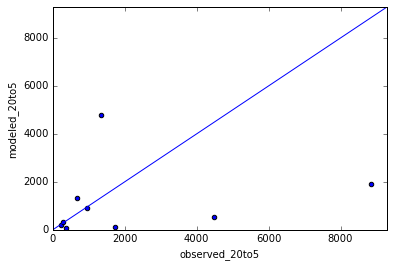

In [146]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [147]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_20to5,modeled_20to5,diff,perc_diff
0,Link Red Line,"69,383","47,315","-22,068",-31.81%
1,Sounder South,"15,356","9,982","-5,374",-35.00%
2,Sounder North,"1,667","2,469",803,48.15%


r^2 : 0.999376377742


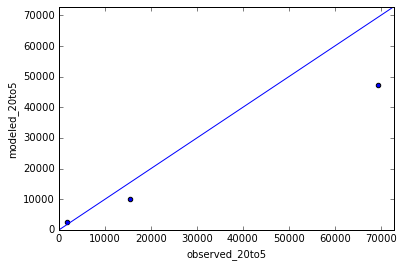

In [148]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [149]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_20to5', ascending=False)

,description,observed_20to5,modeled_20to5,diff,perc_diff
6,E Line RapidRide,"15,336","20,132","4,796",31.27%
10,Sound Transit 550,"9,168","16,037","6,870",74.93%
1,KC Metro 40,"11,405","14,951","3,546",31.09%
5,D Line RapidRide,"13,078","14,364","1,286",9.83%
4,C Line RapidRide,"11,368","13,659","2,291",20.15%
0,KC Metro 7,"10,150","10,565",415,4.09%
2,A Line RapidRide,"8,522","9,212",690,8.10%
3,B Line RapidRide,"5,914","7,929","2,015",34.08%
7,F Line RapidRide,"5,267","7,673","2,406",45.69%
9,First Hill Streetcar,"3,586",953,"-2,633",-73.42%


r^2 : 0.935555860333


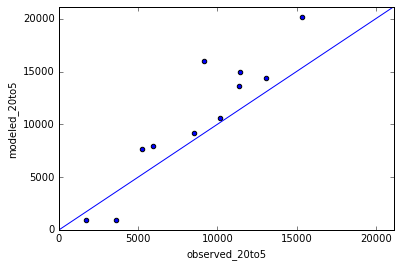

In [150]:
ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5')
lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.862840866326
r^2 Everett Transit: -0.329730181203
r^2 King County Metro: 0.942340198758
r^2 Kitsap Transit: 0.805894509109
r^2 Pierce Transit: 0.935569823336
r^2 Sound Transit: 0.956025563163
r^2 Washington Ferries: 0.855671660904


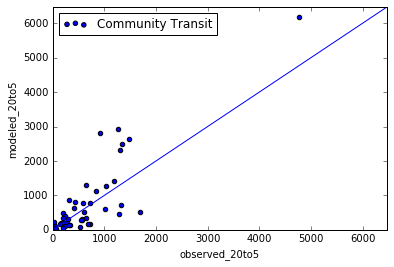

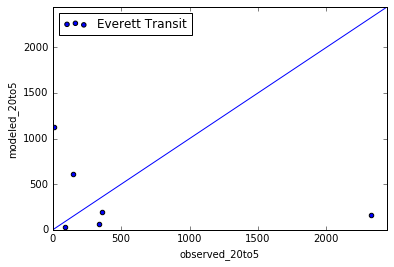

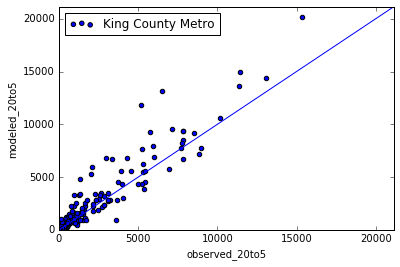

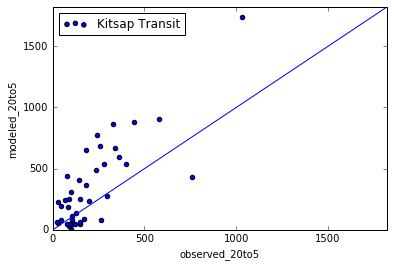

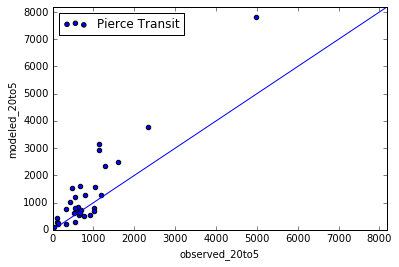

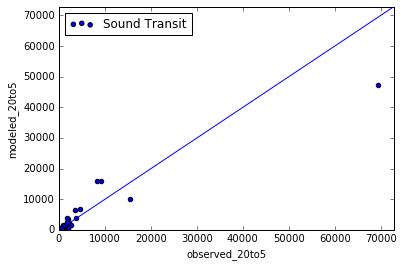

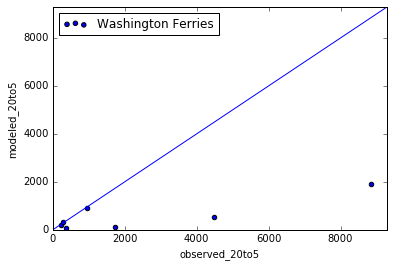

In [151]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_20to5', y='modeled_20to5', label=agency)
    lim = _df[['observed_20to5','modeled_20to5']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_20to5'],_df['modeled_20to5'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [152]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_20to5']-df['observed_20to5']
df['percent_diff'] = df['diff']/df['observed_20to5']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_20to5,modeled_20to5,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","5,553","-3,862",-41.02%
Westlake,"10,904","6,763","-4,141",-37.98%
University St,"5,257","4,937",-320,-6.09%
Pioneer Square,"3,865","3,511",-354,-9.15%
Int'l District,"5,647","2,852","-2,795",-49.49%
Capitol Hill,"7,016","5,677","-1,340",-19.10%
Stadium,"1,912",479,"-1,433",-74.93%
SODO,"2,108","2,469",362,17.17%
Beacon Hill,"2,587","1,255","-1,332",-51.50%


Sound Transit Station Groupings

In [153]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_20to5','modeled_20to5']]
df_combined['diff'] = df_combined['modeled_20to5']-df_combined['observed_20to5']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_20to5']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_20to5,modeled_20to5,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","5,553","-3,862",-41.02%
Capitol Hill,"7,016","5,677","-1,340",-19.10%
Westlake/University St,"16,161","11,700","-4,461",-27.60%
Pioneer Square/Int'l District,"9,512","6,364","-3,149",-33.10%
Stadium/SODO,"4,020","2,949","-1,071",-26.65%
Beacon Hill/Mount Baker,"4,809","2,795","-2,014",-41.88%
Columbia City,"2,376","1,158","-1,218",-51.25%
Othello/Rainier Beach,"4,412","2,666","-1,746",-39.57%
Tukwila Int'l Blvd,"2,779","1,676","-1,103",-39.70%


# Stop Transfers

### Light Rail

In [154]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.26,-99.00,99.26,-100.26%
Westlake,0.37,0.36,0.00,1.26%
University St,0.57,0.20,0.37,182.57%
Pioneer Square,0.63,0.16,0.47,297.94%
Int'l District,0.79,0.45,0.34,75.08%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.43,0.12,0.31,260.27%
SODO,0.47,0.31,0.16,51.55%
Beacon Hill,0.37,0.35,0.01,3.81%


# Externals

In [155]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","152,684","22,684",17.45%
I-5 to Mount Vernon,3744,"67,000","65,288","-1,712",-2.56%
I-90 @ Snoqualmie Pass,3739,"33,000","29,731","-3,269",-9.90%
SR-532 to Camano Island,3746,"23,000","20,711","-2,289",-9.95%
SR-507 to Yelm,3734,"23,000","19,145","-3,855",-16.76%
SR-3 to Belfair,3749,"18,000","21,012","3,012",16.73%
Hood Canal Bridge,3748,"18,000","17,691",-309,-1.72%
SR-530 N/O Stanwood,3745,"9,100","8,067","-1,033",-11.35%
Mukilteo-Clinton Ferry,3747,"6,300","7,632","1,332",21.14%
